In [69]:

import numpy as np

import bilby

# Specify the output directory and the name of the simulation.
outdir = 'outdir'
label = 'bns_example'
bilby.core.utils.setup_logger(outdir=outdir, label=label)

# Set up a random seed for result reproducibility.  This is optional!
np.random.seed(88170235)

# We are going to inject a binary neutron star waveform.  We first establish a
# dictionary of parameters that includes all of the different waveform
# parameters, including masses of the two black holes (mass_1, mass_2),
# aligned spins of both black holes (chi_1, chi_2), etc.
injection_parameters = dict(
    mass_1=1.5, mass_2=1.3, chi_1=0.02, chi_2=0.02, luminosity_distance=0.1,
    theta_jn=0.4, psi=2.659, phase=1.3, geocent_time=1126259642.413 + 10,
    ra=1.375, dec=-1.2108, lambda_1=400, lambda_2=450)

# Set the duration and sampling frequency of the data segment that we're going
# to inject the signal into. For the
# TaylorF2 waveform, we cut the signal close to the isco frequency
duration = 32
sampling_frequency = 2 * 1024
start_time = injection_parameters['geocent_time'] + 2 - duration

# Fixed arguments passed into the source model. The analysis starts at 40 Hz.
waveform_arguments = dict(waveform_approximant='IMRPhenomPv2_NRTidal',
                          reference_frequency=50., minimum_frequency=40.0)

# Create the waveform_generator using a LAL Binary Neutron Star source function
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_binary_neutron_star,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters,
    waveform_arguments=waveform_arguments)

In [70]:

# Set up interferometers.  In this case we'll use three interferometers
# (LIGO-Hanford (H1), LIGO-Livingston (L1), and Virgo (V1)).
# These default to their design sensitivity and start at 40 Hz.
interferometers = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])
for interferometer in interferometers:
    interferometer.minimum_frequency = 40
interferometers.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=start_time)
interferometers.inject_signal(parameters=injection_parameters,
                              waveform_generator=waveform_generator)

# plot the data for sanity
signal = interferometer.get_detector_response(
    waveform_generator.frequency_domain_strain(), injection_parameters)
interferometer.plot_data(signal=signal, outdir=outdir, label=label)



/Users/spx8sk/anaconda3/envs/scrinet-dev/lib/python3.7/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
16:11 bilby INFO    : Injected signal in H1:
16:11 bilby INFO    :   optimal SNR = 17214.93
16:11 bilby INFO    :   matched filter SNR = 17214.92+1.19j
16:11 bilby INFO    :   mass_1 = 1.5
16:11 bilby INFO    :   mass_2 = 1.3
16:11 bilby INFO    :   chi_1 = 0.02
16:11 bilby INFO    :   chi_2 = 0.02
16:11 bilby INFO    :   luminosity_distance = 0.1
16:11 bilby INFO    :   theta_jn = 0.4
16:11 bilby INFO    :   psi = 2.659
16:11 bilby INFO    :   phase = 1.3
16:11 bilby INFO    :   geocent_time = 1126259652.413
16:11 bilby INFO    :   ra = 1.375
16:11 bilby INFO    :   dec = -1.2108
16:11 bilby INFO    :   lambda_1 = 400
16:11 bilby INFO    :   lambda_2 = 450
16:11 bilby INFO    : Injected signal in L1:
16:11 bilby INFO    :   optimal

In [71]:
# signal_1 = signal.copy()

In [72]:
# signal_2 = signal.copy()

In [73]:
import matplotlib
import matplotlib.pyplot as plt

In [74]:
waveform_generator.frequency_array

array([0.00000000e+00, 3.12500000e-02, 6.25000000e-02, ...,
       1.02393750e+03, 1.02396875e+03, 1.02400000e+03])

In [75]:
signal_1

array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
       0.00000000e+00+0.00000000e+00j, ...,
       5.64821862e-26-2.79002627e-25j, 1.58650138e-25-2.36339132e-25j,
       0.00000000e+00+0.00000000e+00j])

In [76]:
signal_1.shape

(32769,)

In [77]:
signal_2.shape

(32769,)

In [78]:
signal_2

array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
       0.00000000e+00+0.00000000e+00j, ...,
       4.92478250e-26-2.80411257e-25j, 1.52500502e-25-2.40401257e-25j,
       0.00000000e+00+0.00000000e+00j])

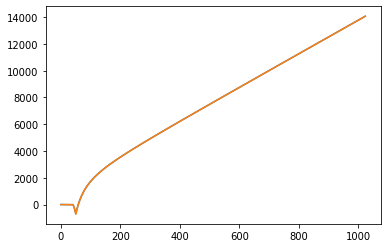

In [79]:
plt.figure()

plt.plot(waveform_generator.frequency_array, np.unwrap(np.angle(signal_1)))
plt.plot(waveform_generator.frequency_array, np.unwrap(np.angle(signal_2)))
# plt.xlim(200, 210)

In [80]:
interferometer.time_domain_strain

array([ 8.91183880e-22, -3.06409899e-22,  6.20701917e-22, ...,
        1.61220794e-22,  1.57836533e-22, -1.19185524e-23])

In [81]:
# interferometer1=interferometer

(1126259642.3130002, 1126259642.443)

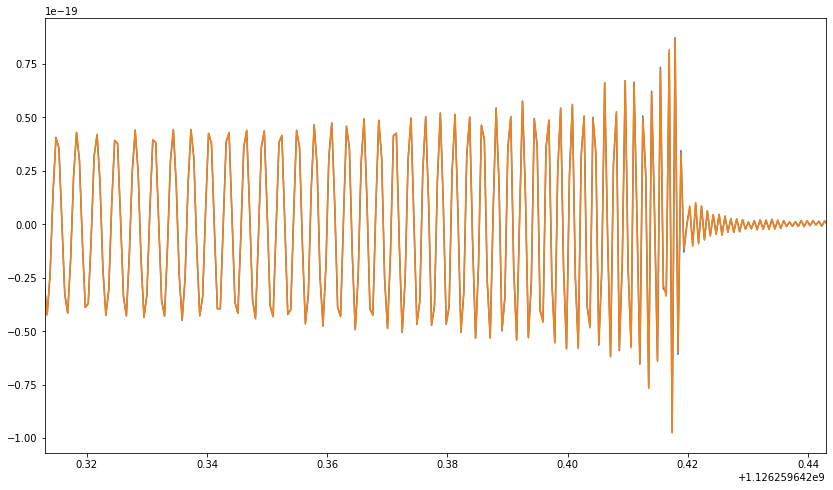

In [113]:
plt.figure(figsize=(14, 8))
plt.plot(interferometer1.time_array, interferometer1.time_domain_strain)
plt.plot(interferometer.time_array-10, interferometer.time_domain_strain)
plt.xlim(1126259612.413 + 29.9, 1126259612.413 + 30.03)

In [84]:
interferometer1.time_array[0]

1126259612.413